# Naive Bayes

## Problem

We will continue our classification problem from our EDA. To start we will only focus on using one discrete feature to make our classification:

- geographic location

## Choosing a model

How can we come up with a probabilistic model to make our classification?

Well let us think about what data we have. We have observed samples of crocodiles and alligators in a variety of geographic locations.
And we want to use this geographic data to build a model, that helps us distinguish between the two species.

So, we want to determine the probability of a crocodile (or alligator), given that we have observed some data about its geographic location. Additionally, we
probably want to compare this value to the probability that we have an alligator, given we know its geographic location.

We can translate this directly into a probabilistic statement: $P(\text{Species} | \text{Location})$. In general, for these types of problems, we have $P(\text{Class} | \text{Data / Evidence})$.

And for a specific instance:

$P(\text{Species=Alligator} | \text{Location=US})$ vs $P(\text{Species=Alligator} | \text{Location=US})$

By bayes rules we have:

$P(\text{Species=Crocodile} | \text{Location=US}) = \dfrac{P(\text{Species=Crocodile} \cap \text{Location}) }{P(\text{Location=US})}$ and

$P(\text{Species=Alligator} | \text{Location=US}) = \dfrac{P(\text{Species=Alligator} \cap \text{Location}) }{P(\text{Location=US})}$

And to determine whether the animal we are looking at is a crocodile or alligator we can just choose the larger probability!

Notice that the numerator of our equation does not change in either instances? This value will not affect our comparison in any way.
Therefore, we can just focus on numerator: $P(\text{Crocodile} \cap \text{Location})$

#### Joint probabilities and the chain rule

$P(\text{Species} \cap \text{Location})$

This object is referred to as the joint probability, and is the central object of focus in many problems. There are some issues with the joint probability
however!

It can be very difficult to calculate! Both in terms of size requirements and data availability.

[//]: # (TODO: Let us give a concrete example. Say we have $P(X_1, X_2,)...$)

It is often much more common to decompose this object into many smaller objects, which are much more manageable to compute. This is done using the chain or product rule. There
are two equivalent ways to re-write this statement:

- $P(\text{Species}) * P( \text{Location} | \text{Species})$
- $P(\text{Location}) * P( \text{Species} | \text{Location})$

Which one do we choose? In the previous section we already established that we are ultimately trying to calculate $P(\text{Species} | \text{Location})$, so it would be redundant
to include this in numerator. So the answer is $P(\text{Species}) * P( \text{Location} | \text{Species})$. However, it is worth taking a bit of time to differentiate the two as
this is a large point of confusion. In fact there is a fallacy associated with this confusion: https://en.wikipedia.org/wiki/Confusion_of_the_inverse.

$P( \text{Location} | \text{Species})$ says, 'I want the probability of the location I am in given that I know the species'
$P( \text{Species} | \text{Location})$ says, 'I want the probability of the species given I know our location.'

In our case, the joint probability is ultimately an intersection of two sample spaces, and the conditional tells us what subset of this sample space we should choose. A simple example with small
sample spaces can help illustrate:

$\text{Species} = \{ \text{Croc}, \text{Alligator} \} $,  $\text{Location} = \{ \text{US}, \text{Australia}, \text{Mexio}  \} $

$\text{Location}  \times \text{Species} = \{ (\text{US}, \text{Croc}), (\text{US}, \text{Alligator}), (\text{Australia}, \text{Croc}), (\text{Australia}, \text{Alligator}), (\text{Mexico}, \text{Croc}), (\text{Mexico}, \text{Alligator}) \} $

In terms of the subsets that are chosen:

$P(\text{Croc} |  \text{US}) = \dfrac{ P( \{  (\text{US}, \text{Croc}), (\text{US}, \text{Alligator}) \} ) }{ P(\text{US})  } $

vs

$P(\text{US} |  \text{Croc}) = \dfrac{P(  \{ (\text{US}, \text{Croc}), (\text{Australia}, \text{Croc}), (\text{Mexico}, \text{Croc}) \}  )}{ P(\text{Croc})} $

We can see how the two expressions are in fact both very different. In order to eliminate confusion it is helpful, to convert the probabilities into language, that makes
it easy to distinguish between the two statements (As we've done above - Ie: 'I want the probability of the location I am in given that I know the species').

It is also worth noting that part of the power of factorizing the joint, is that we can choose a conditional probability that is easier to calculate.

Okay great! So this these are the probabilities we would like to calculate.

- $P(\text{Crocodile})$ is called our prior
- $P( \text{Location} | \text{Crocodile})$ is called the likelihood

Note will just focus on calculating the probability for crocodiles since the probability for alligators will also follow the same logic.


## Calculating Probabilities

So we know the probabilities we would like to calculate. Before we continue let us get a bit more rigorous so we can extend these ideas to more complicated problems in the future.

### Sample space and random variables

What is our sample space?

Well we have two sets, the first is just the possible classes our species belong to:  $\text{Species} = \{ \text{croc}, \text{alligator} \}$.

The second is the possible geographic locations crocs/gators live: $\text{Location} = \{ \text{us}, \text{mexico}, \text{africa}, \text{south-east asia}, \text{australia},  \text{south-america} \}$,

It is useful to encode the possible outcomes of our sets as real numbers, so we can define some random variables $S$, $L$  on our sets.

Let $s \in \text{Species}, l \in \text{Location}$

$
S(s) =
\begin{cases}
          1, & \text{ } s = \text{croc} , \\
          0, & \text{ } s = \text{alligator}   \\
  \end{cases}
$

and

$
L(l) =
\begin{cases}
          5, & \text{ } l = \text{us} , \\
          4, & \text{ } l = \text{mexico} , \\
          3, & \text{ } l = \text{africa} , \\
          2, & \text{ } l = \text{south-east asia} , \\
          1, & \text{ } l = \text{australia}   \\
          0, & \text{ } l = \text{south-america}   \\
  \end{cases}
$


What distributions can we use to model our sample spaces?

Well for our $\text{Species}$ outcomes, we just need to model two states, and in our $\text{Location}$ outcomes, we need to model 6 states.

We can use the Bernoulli distribution for the former and the Categorical for the latter.

### Bernoulli

Okay great! Now the only thing left to do is determine the parameters for our distributions. For our Bernoulli distribution we just need a parameter $p$.

Once we have $p$, we can use the PMF:

$
P(S) = p^{S} * (1-p)^{1 - S}
$

Where
$
P(S(s)=1) = p^{1} * (1-p)^{1 - 1} =  p
$
and
$
P(S(s)=0) = p^{0} * (1-p)^{1 - 0} = 1-p
$

But how exactly do we determine what $p$ is? We don't actually know the true proportion of crocodiles to alligators in the world. All we have is some data that
was collected by some agents in the field. This means we must estimate this parameter somehow! We will use a technique called the Maximum Likelihood Estimation (MLE).

#### Likelihood

Note: This is a deep topic, so we will only do a shallow dive here.

The main idea behind this technique, is we will look at the data we have, and choose a parameter (in this case $p$), that "most likely fits" what we have observed. What does "most likely fits"
even mean? Let us look at a concrete example. Say that our the sample of crocodiles and alligators looks like this - that is a sequence of $1$'s for crocodiles and $0$'s for alligators:

$\text{Data} = \{1,1,1,1,0\}$

One question we can ask is: What is the probability of observing this particular sequence? Well in order to answer this question, we need two things:

- $P(S=1)$ and $P(S=0)$, so $p$
- i.i.d assumption

Let us assume that we do have both the probability and the i.i.d assumption. Then all we need to do is:

$P(S=1)^4 * P(S=0)^1 = \prod\limits_{i=0}^n P(S_i)$

This calculation is known as the likelihood of a dataset.

Now let us think for a second. If we had to guess $p$, what value do we think would best represent this data set. Or in other words, what value of $p$ would likely
fit this data set? Well there are $4 \text{ crocodile}$ observations and $1 \text{ alligator}$ observation. Since there are far more $\text{crocodiles}$ then $\text{alligators}$,
a reasonable guess might be a high value of $p$, maybe $p=.7$. Our reasoning here is that a Bernoulli distribution where $p$ is high means that there is a greater probability
of sampling a crocodile. And indeed this would be a good guess.

##### Maximizing likelihood

Now that we have some intuition, what do different values of likelihood represent? To answer this, let us think about how products work.

If we choose a high probability for our sample, a sequence where one value dominance the sequence, then we have:

$.8 * .8  * .8 * .8 * .2 = .0819$

Conversely, if we choose a low probability, we have:

$.2 * .2  * .2 * .2  * .8 = .0012$

The first likelihood value is greater than the second. Should we just choose the highest probability then, like $.99$? Well if we did, the first 4 entries this would yield
a likelihood of:

$.99 * .99  * .99 * .99  = .96$ , which is indeed high.

And if $p=.8$ for the first 4 entries:

$.8 * .8  * .8 * .8  = .4096$, which is much lower.

But when we do see that 1 alligator:

$.96 * .01 = .009$

$.4096 * .2 = .0819$

$1-p=.99$ dramatically scales down the likelihood, whereas even though at $p=.8$ our likelihood was much smaller initially, the scaling factor of $1-p=.2$ is much less of a change.
The takeaway here is we are looking for a $p$ that maximizes the likelihood, and fits our data set just right. What we effectively want is the likelihood as a function of $p$.

The parameter in this case, is our data $D$.

$L(p;D) = \prod\limits_{i=0}^n P(S_i) = p^{4} * (1-p) $

We can visualize here what the likelihood looks like:


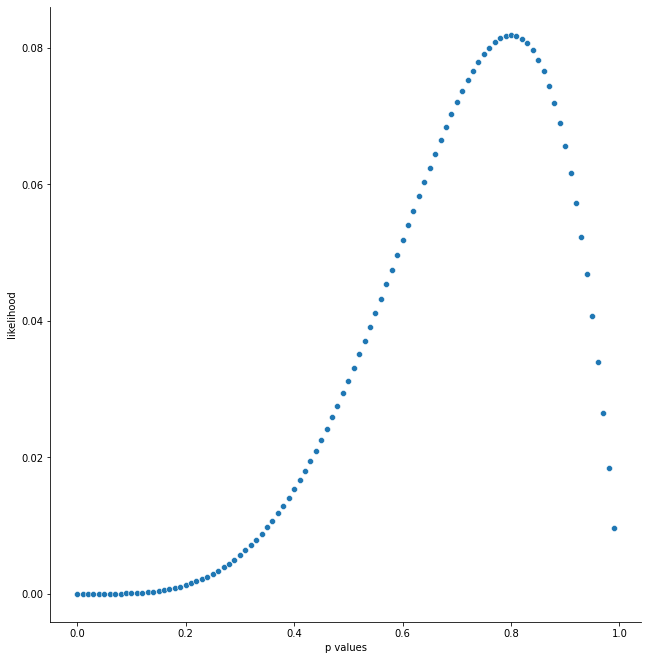

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import pseudo data set
df = pd.read_csv('../../data/tabular/croc-aligator.csv')
training_data = pd.DataFrame(
    {'weight': df.weight
        ,'length': df.length
        , 'num_of_teeth': df.num_of_teeth
        , 'angle_from_snout': df.angle_from_snout
        , 'location': df.location
        , 'species': df.species
     }
).to_numpy()

def likelihood(p) -> float:
    return p**4 * (1-p)

likelihood_vect = np.vectorize(likelihood)
domain = np.arange(0,1,.01)
plot = sns.relplot(x=domain,y=likelihood_vect(domain))
plot.fig.set_size_inches(10,10)
plot.set(xlabel ="p values", ylabel = "likelihood")


Wow! It does it fact seem like $p=.8$ fits our example data best. What about if we used this technique on our actual data?

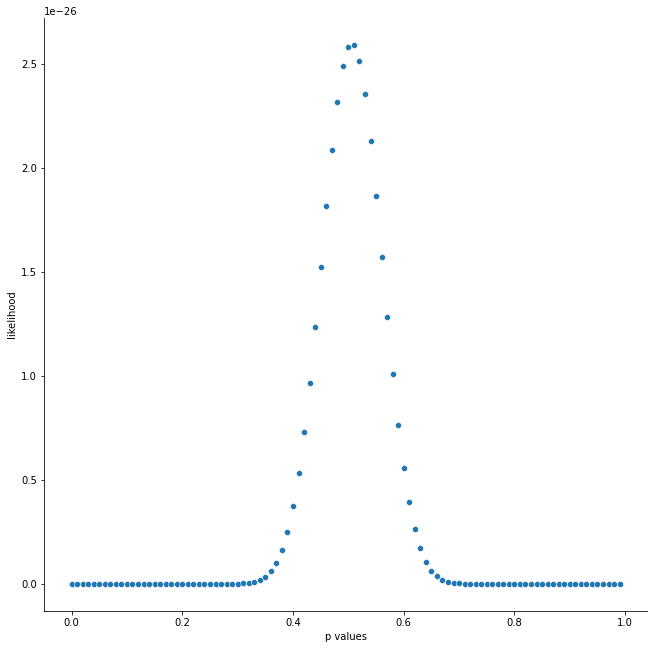

In [91]:
croc_count = len(df.query('species == "a"'))
gator_count = len(df.query('species == "c"'))
def likelihood(p) -> float:
    return p**croc_count * (1-p)**gator_count

likelihood_vect = np.vectorize(likelihood)
domain = np.arange(0,1,.01)
plot = sns.relplot(x=domain,y=likelihood_vect(domain))
plot.fig.set_size_inches(10,10)
plot.set(xlabel ="p values", ylabel = "likelihood")


We can see roughly that our $p$ value is .5. While we are doing a visual inspection here of our parameter here, this is really an optimization problem.

Given any parameter $\theta$, we want the $\text{argmax}_\theta L(\theta; Data) = \prod\limits_{i=0}^n P(S_i) = \prod\limits_{i=0}^n  \theta^{S_i} * (1-\theta)^{1 - S_i}  $.

If we were to work this out analytically, we would get $\theta = \text{mean} $. Let's go ahead and see if this is true by encoding our croc/alligator data with our
random variable and then taking the mean:


In [23]:
def random_var_ber(x) -> int:
    if x == 'c':
        return 1
    else:
        return 0

training_data[:, 5]


array(['c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c',
       'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c',
       'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c',
       'c', 'c', 'c', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a'], dtype=object)

WIP:

We can go ahead and finally visualize our distribution now.

A note on sampling:

This makes sense since we actually have the same number of crocodile and alligator observations. While this was hopefully helpful for illustration purposes, we have no idea how this data was
actually sampled or why we have the same number of observations for both species.


Let us take a look at  $P( X_G = \text{Location})$

<AxesSubplot:xlabel='species', ylabel='Probability'>

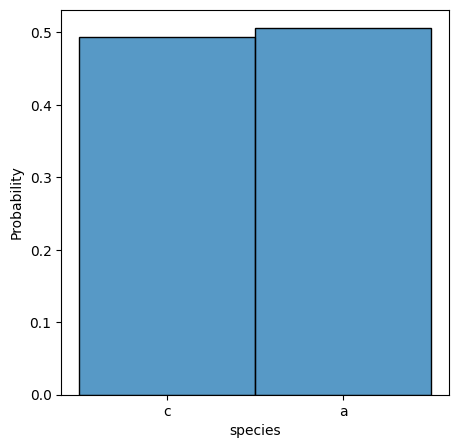

In [20]:
##Visualize the data
plt.subplots(figsize=(5,5))
sns.histplot(data=df, x='species', stat='probability')


<AxesSubplot:xlabel='location', ylabel='Probability'>

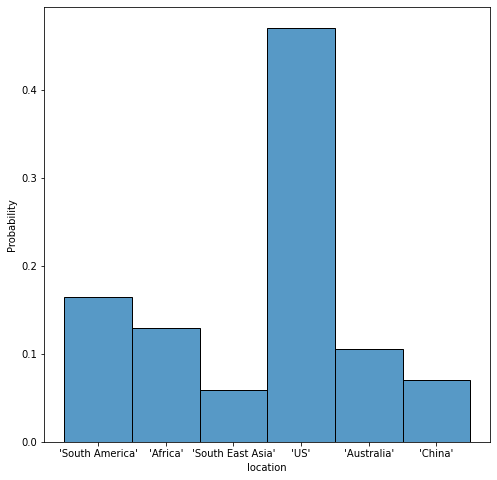

In [19]:
plt.subplots(figsize=(8,8))
sns.histplot(data=df, x='location', stat='probability')

It is interesting that we have such a high number of alligators/crocodiles in the states. Let's see if this changes
as we condition on species




### Calculating likelihood

We've seen how we can estimate the parameters for our distributions using MLE for $P(X_S=\text{Crocodile})$ and $P(X_G)$. But recall that we actually want
the conditional object $P( X_G | X_S = \text{Crocodile})$ and $P( X_G | X_S = \text{Alligator})$ instead of $P(X_G)$.

What is the difference?

Well $P( X_G | X_S = \text{Crocodile})$

How

Let us assume that there are an equal amount of crocodiles and alligators in the world, (our empirical data also supports this) so we have $P(X_S=\text{Crocodile}) = .5$

Now $P( X_G | X_S = \text{Crocodile})$. We are going to calculate this probability two different ways. The first logical way we can calculate this value, is to simply look
at the data we have, reduce our set to crocodiles, and count how many crocodiles we've observed in the different geographic locations.




P(G=South America|C) = 0.3095
P(G=Africa C) = 0.2619
P(G=US|C) = 0.0952
P(G=South East Asia|C) = 0.119
P(G=Australia|C) = 0.2143


<AxesSubplot:xlabel='location', ylabel='Probability'>

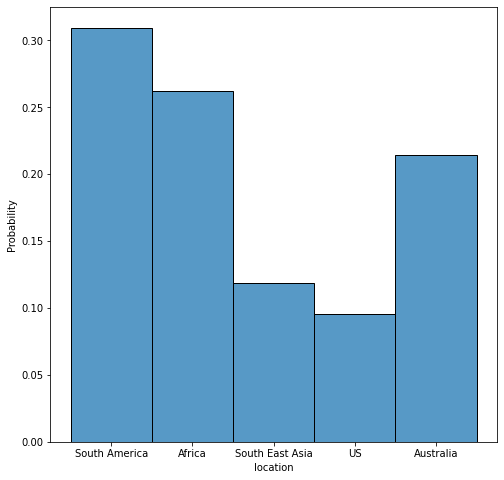

In [76]:
crocs = df.query('species == "c"')

total_crocs = len(crocs)
south_american_crocs = len(crocs.query('location == "South America"'))
african_crocs = len(crocs.query('location == "Africa"'))
us_crocs = len(crocs.query('location == "US"'))
south_east_asian_crocs = len(crocs.query('location == "South East Asia"'))
australian_crocs = len(crocs.query('location == "Australia"'))

print(f'P(G=South America|C) = {round(south_american_crocs/total_crocs, 4)}')
print(f'P(G=Africa C) = {round(african_crocs/total_crocs,4)}')
print(f'P(G=US|C) = {round(us_crocs/total_crocs,4)}')
print(f'P(G=South East Asia|C) = {round(south_east_asian_crocs/total_crocs,4)}')
print(f'P(G=Australia|C) = {round(australian_crocs/total_crocs,4)}')

plt.subplots(figsize=(8,8))
sns.histplot(data=df.query('species == "c"'), x='location', stat='probability')

We can do the same thing for alligators


P(G=South America|C) = 0.0233
P(G=Africa C) = 0.0
P(G=US|C) = 0.8372
P(G=South East Asia|C) = 0.0
P(G=Australia|C) = 0.0
P(G=China|C) = 0.1395


<AxesSubplot:xlabel='location', ylabel='Probability'>

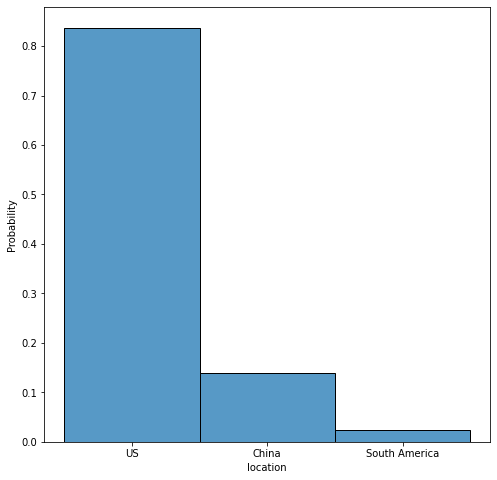

In [78]:
gators = df.query('species == "a"')

total_gators = len(gators)
south_american_gators = len(gators.query('location == "South America"'))
african_gators = len(gators.query('location == "Africa"'))
us_gators = len(gators.query('location == "US"'))
south_east_asian_gators = len(gators.query('location == "South East Asia"'))
australian_gators = len(gators.query('location == "Australia"'))
chinese_gators = len(gators.query('location == "China"'))

print(f'P(G=South America|C) = {round(south_american_gators/total_gators, 4)}')
print(f'P(G=Africa C) = {round(african_gators/total_gators,4)}')
print(f'P(G=US|C) = {round(us_gators/total_gators,4)}')
print(f'P(G=South East Asia|C) = {round(south_east_asian_gators/total_gators,4)}')
print(f'P(G=Australia|C) = {round(australian_gators/total_gators,4)}')
print(f'P(G=China|C) = {round(chinese_gators/total_gators,4)}')

plt.subplots(figsize=(8,8))
sns.histplot(data=df.query('species == "a"'), x='location', stat='probability')